# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Support Vector Machines

## Learning Objectives

*After this lesson, students will be able to:*
1. **Describe** linear separability.
2. **Differentiate between** maximal margin, soft-margin, and kernel SVMs
3. **Implement** SVMs in `scikit-learn`.
4. **Describe** the effects of `C` and kernels on SVMs.

## Agenda
I. **Support Vector Machines** (60 minutes total)
- Intuition
- An SVM Play, in Three Acts:
    1. Maximal Margin SVMs
    1. Soft-margin SVMs
    1. Kernel SVMs
- Kernel Trick

II. **Coding** (30 minutes total)

**Note**: If you read resources online, you may see terms like "abscissa," "Lagrange multipliers," and "convex optimization." SVMs are pretty mathematical in nature, but we've tried to strip most of the complex terminology away and boil SVMs down to their important points.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Act I: The SVM by Maximal Margin (An Intuitive but Unlikely Model)

Today, we're going to learn a very intuitive classifier called the **support vector machine**.

#### NOTE: We're going to build a useful SVM over three steps.
These are:
- the maximal margin classifier, 
- the support vector classifier, and 
- the kernel support vector machine. 

Practically, we're going to really only use the support vector machine (often abbreviated SVM). But people often use the term "support vector machine" to refer to all three of the above classification algorithms.

In [31]:
age_train = [25, 30, 35, 35, 50, 45, 50, 55, 65, 65]
income_train = [50, 70, 60, 70, 65, 30, 40, 45, 30, 60]
party_train = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

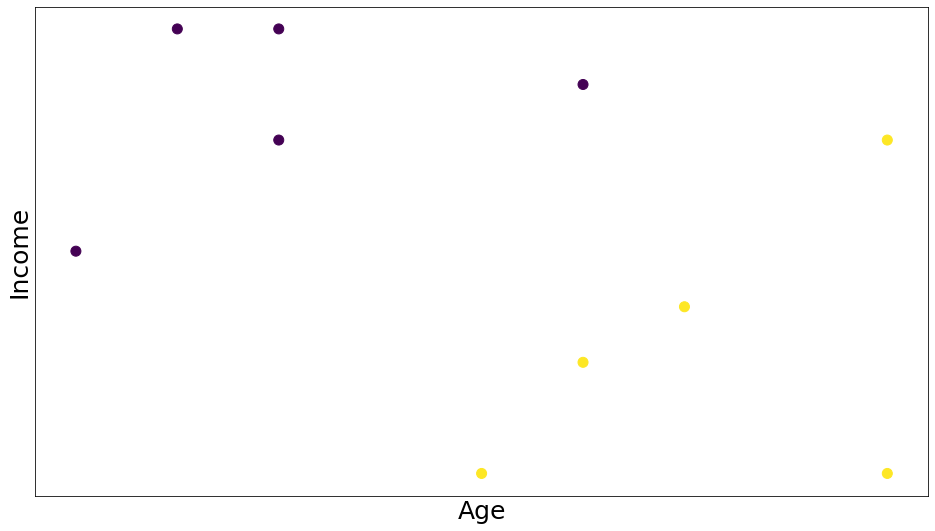

In [32]:
plt.figure(figsize=(16,9))
plt.xlabel("Age", fontsize = 25)
plt.ylabel("Income", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.scatter(age_train, income_train, c=party_train, s=100);

- Note that the axes are two features: Age and Income.
- Note that the $y$ variable here we want to predict is political party. Purple corresponds to one political party and yellow corresponds to another political party.

<details><summary>Looking at this plot, how might we intuitively create a classifier to differentiate between the purple political party and the yellow political party?</summary>

- Draw a diagonal line through the plot. This line should be drawn such that all of the purple dots are on one side of the line and all of the yellow dots are on the other side of the line.
</details>

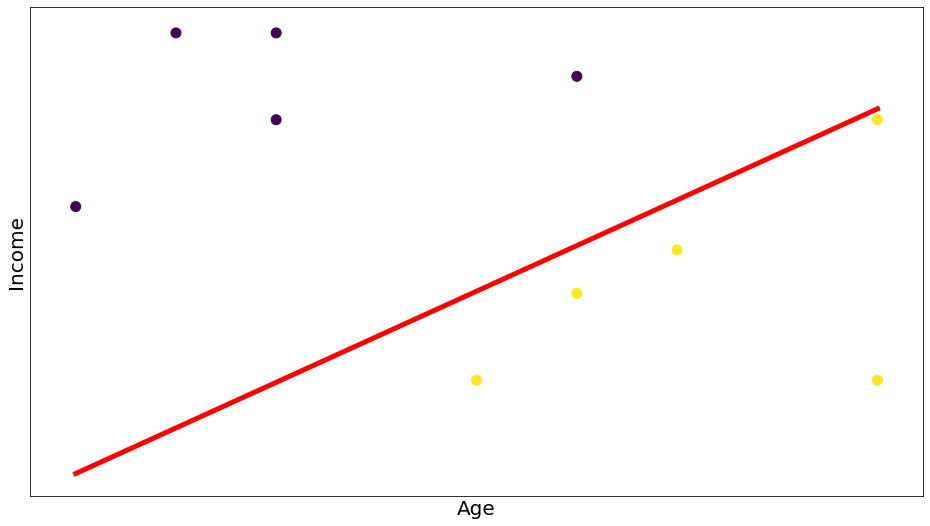

In [33]:
# Set plot up.
plt.figure(figsize=(16,9))
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Income", fontsize = 20)
plt.xticks([])
plt.yticks([])

## Plot classification line.
x = np.linspace(min(age_train), max(age_train))
plt.plot(x, 1.05 * x - 7, c = 'red', lw = 5)

## Generate scatterplot.
plt.scatter(age_train, income_train, c=party_train, s=100);

<details><summary>Do you like this line? Why or why not?</summary>

- The line perfectly classifies political party based on our *training* data.
- However, the line is very close to our yellow political party. If we have any testing data that is even a little bit different than our training data, we might misclassify our testing observations.
- Example: A member of the yellow political party at (65, 65) would be on the "wrong" side of the line.
- This line appears to not be very robust to deviations from our training data.
</details>

---
## To the iPad!
---

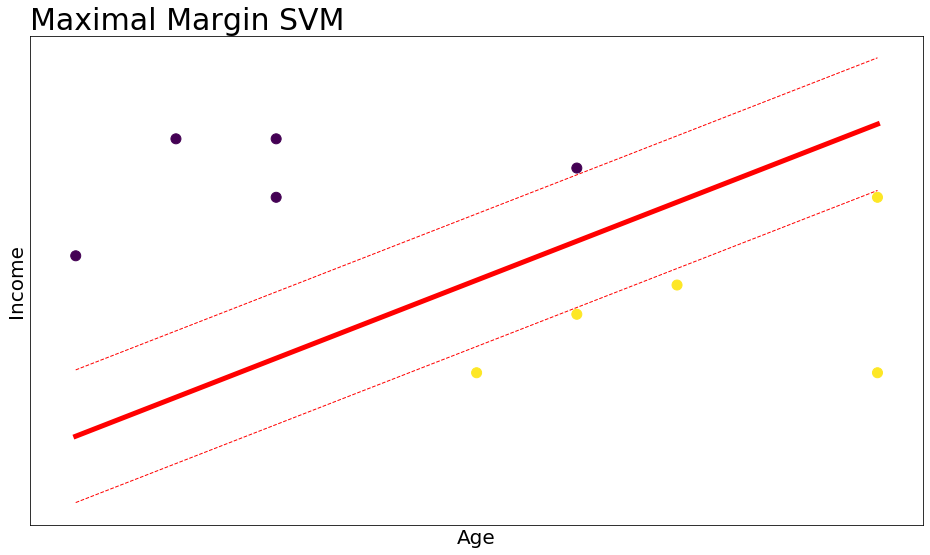

In [34]:
# Set plot up.
plt.figure(figsize=(16,9))
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Income", fontsize = 20)
plt.xticks([])
plt.yticks([])
x = np.linspace(min(age_train), max(age_train))

## Separating line of best fit.
## (We're going to ignore how the calculation of this occurs - sklearn will do this for us!)
yy = ((-0.10668 / -0.07996) * x - (-1.13626 / -0.07996))

## Calculation of maximal margin.
## (Again, ignore the actual numbers here)
margin = 1 / np.sqrt(0.017774224) + 1
yy_down = yy + (-0.10668 / -0.07996) * margin
yy_up = yy - (-0.10668 / -0.07996) * margin

## Plot line of best fit.
plt.plot(x, yy, c = 'red', lw = 5)

## Plot maximal margin.
plt.plot(x, yy_down, c = 'red', lw = 1, linestyle='--')
plt.plot(x, yy_up, c = 'red', lw = 1, linestyle='--')

## Generate scatterplot.
plt.title("Maximal Margin SVM", fontsize = 30, ha = 'left', position = (0,1))
plt.scatter(age_train, income_train, c=party_train, s=100);

#### What we see above is a *Maximal Margin SVM*. 

This is:
- a **classifier**
- that finds the best line separating the observations into the right classes, and
- **maximizes** the **margin** between that line and the observations.

<details><summary>What might be a problem with the maximal margin classifier if our data set is really noisy? (In this case, if the political parties are not as cleanly separated?)</summary>

- The margin might be really small.
- We might not be able to even find a margin!
</details>

## Act II: The Soft-margin Support Vector Machine

A maximal margin classifier only exists where we can **perfectly** separate the groups. A support vector classifier is an algorithm where we still find a margin that best separates the groups, but it doesn't have to be perfect.
- We specify a hyperparameter `C` that will regularize the boundary that is fit between classes. (More on this hyperparameter in a bit!)

### Linear Separability
The data above were **linearly separable**. This simply means that they can be separated by a line.
- Since I had two features (age and income), the boundary that separates my classes is a line.
- If I had three features (age, income, and number of members in my household), the boundary that separates my classes is a plane.
- It gets hard to visualize for more features, but it works in higher dimensions as well! We simply refer to this as a *hyperplane*. (A plane, but in any number of dimensions.)

![](https://qph.fs.quoracdn.net/main-qimg-2d95de2354bdbda8e28b946772c6374c)

In many cases, our data will not be linearly separable. If we have 10 features and 1000 training examples, it's probably unlikely that we'll find one "hyperplane" that will perfectly separate our classes. **This is where our support vector machine comes into play!**

---
## To the iPad!
---

## Support Vector Machine

Support vector machines are a more general form of support vector classifiers where we can have a non-linear separation between classes.

We are going to take our features, then transform them into higher dimensions so that a linear separation exists.

![](https://cdn-images-1.medium.com/max/1600/0*ngkO1BblQXnOTcmr.png)

In this example, we've taken data (left-hand side) that is in two dimensions and we have done some transformation to force it into three dimensions. In two dimensions, we can't separate our red and blue observations with a linear boundary. In three dimensions, we can see that there exists a linear boundary that separates the classes!

The specific term used to describe how SVMs transform features into higher dimensions is called the **kernel trick**, which is a very computationally efficient (and clever) way for us to create new features from old features. (In the example above, this new feature $Z$ was created from the existing features $X$ and $Y$.)

### Kernels
Kernels sound complicated, but their definition is super simple. A **kernel** is any function $K$ that takes in two vectors and returns a scalar.

<details><summary>Formally...</summary>
    A <b>kernel</b> is any function $K$ such that
    $$ K: \mathbb{R}^p \times \mathbb{R}^p \longrightarrow \mathbb{R} $$
</details>

### The "Kernel Trick"
The kernel trick is simple. Any time you see:

$$ x_i^T x_j $$

replace it with:

$$ K(x_i, x_j) $$

#### MATH WARNING
Specifically, in the context of SVMs, another way of writing the optimization objective function is:

$$ L_D = \sum \alpha_i - \frac{1}{2}\sum\sum \alpha_i \alpha_j y_i y_j x_i^T x_j $$

and so we rewrite it as:

$$ L_D = \sum \alpha_i - \frac{1}{2}\sum\sum \alpha_i \alpha_j y_i y_j K(x_i, x_j) $$

### What kernels are out there?
- `linear`(**equivalent to soft-margin**): Linear kernel. This gives us the support vector classifier. This works best with linearly separable data.
<details><summary>Math:</summary>
$$ K(x_i, y_i) = x_i^Tx_j$$    
</details>
- `rbf` (**default**): Radial basis kernel. Radial, like radius, works particularly well with circular/spherical data.
<details><summary>Math:</summary>
$$ K(x_i, y_i) = \exp\{-\gamma\|x_i - x_j\|^2\}$$    
</details>
- `polynomial`: Polynomial kernel. Used less frequently; this works well with non-linear and non-spherical data.
<details><summary>Math:</summary>
$$ K(x_i, y_i) = (1 + x_i^T x_j)^d $$    
</details>
- `sigmoid`: Sigmoid kernel. Used less frequently; this works well with non-linear and non-spherical data. (**Note:** The term "sigmoid" is a misnomer here. It does not resemble the form of the sigmoid activation function we'll learn about in neural net week!)
<details><summary>Math:</summary>
$$ K(x_i, y_i) = \tanh(\kappa_1x_i^T x_j + \kappa_2)$$    
</details>
- Custom kernels: Not recommended until you're comfortable with the existing values.

**NOTE:** The above plot was actually a **polynomial kernel with degree 2.**

#### Which to pick?
- **Quick answer**: As long as it's not the linear kernel, it actually matters surprisingly little!
- **Better answer**: Use the RBF kernel, as it's usually best (or no different from other options).
- **If you have 3 or fewer features**: Plot your features to see which you think seems to be best. (i.e. do you see circular patterns in your data?)
- **If you have 4 or more features**: GridSearch or RandomizedSearch over the default options.

#### Other uses for kernels
The kernel trick is famous for being useful with SVMs, but it's not unique to them. The kernel trick can be useful in many other aspects of data science. For example, the following algorithms all exist:
* Kernel linear models (aka, smoothers or "splines"!)
* Kernel Principal Components Analysis (kPCA)
* Kernel (canonical) correlation analysis (kCCA)

### Hyperparameters of SVMs
SVMs will have two main hyperparameters: `C` and `kernel`.

#### Parameter: `C`
`C`, as described above, controls how much we regularize the boundary that is fit between classes.
- **If `C` is small**: We regularize substantially, leading to a less perfect classification of our training data.
- **If `C` is large**: We do not regularize much, leading to a more perfect classification of our training data.

<details><summary>As C gets larger, how do you think the bias-variance tradeoff is affected?</summary>

- As C increases, we more perfectly classify our training data. This is overfitting, so our model would suffer from high error due to variance.
</details>

#### Parameter: `kernel`
There are several options as discussed above:
* `linear`, `rbf`, `polynomial`, `sigmoid`, or something custom

---
## To the iPad for a dicussion of what regularization means here!
---

### Support Vector Machines aren't just for binary classification!

We can use SVMs for more than two classes. There's not anything we need to do here to change that - `sklearn` will detect how many distinct values you have in your `y` variable and fit the model accordingly.

## Coding with [MNIST Digits Dataset](https://en.wikipedia.org/wiki/MNIST_database)

In [1]:
# Import packages.
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
# Load digits.
digits = datasets.load_digits()

# Check out data.
digits.data.shape

(1797, 64)

In [3]:
# How many observations do we have?
# NOTE: Data is in a NumPy array!
type(digits.data)

numpy.ndarray

In [4]:
import matplotlib.pyplot as plt
# Generate heatmap.
plt.imshow(
    digits.images[42],
    cmap=plt.cm.gray_r,
)

In [5]:
digits.images[42]

array([[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 11.,  0.,  0.],
       [ 0.,  2., 12., 16., 16., 10.,  0.,  0.],
       [ 0.,  6., 11.,  5., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]])

In [6]:
# What is the actual class?
digits.target[42]

1

In [7]:
# Create X and y.
X, y = digits.data, digits.target 

In [8]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Instantiate support vector machine.
svc = SVC()

In [15]:
import pandas as pd 
pd.Series(y_train).dtypes

dtype('int32')

In [16]:
pd.DataFrame(X_train).dtypes.unique()

array([dtype('float64')], dtype=object)

In [17]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Fit support vector machine to training data.
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# Generate predictions.
y_pred = svc.predict(X_test)

In [20]:
# Measure performance based on accuracy.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4006734006734007

<details><summary>Is accuracy the best metric to use here? Why or why not?</summary>

- Accuracy is likely the best metric to use here. Improperly classifying a number is equally bad, no matter what number you incorrectly predict. For example, misclassifying a `4` as a `3` or `5` or `9` is equally bad.
- Many of our other classification metrics (like sensitivity and specificity) don't easily generalize to classification with more than two classes.
</details>

### Spend three minutes trying different hyperparameter values. (Feel free to guess and check or use GridSearch/RandomizedSearch!) We'll report our best values in a moment.

In [33]:
# Instantiate SVM.
svc = SVC(C=100, kernel='rbf')

# Fit on training data.
svc.fit(X_train, y_train)

# Evaluate model.
accuracy_score(y_test, svc.predict(X_test))

0.4562289562289562

In [34]:
# Import Pandas.
import pandas as pd

# Create DataFrame with column for predicted values.
results = pd.DataFrame(svc.predict(X_test), columns=['predicted'])

# Create column for observed values.
results['actual'] = y_test

In [35]:
# Check out first five rows.
results.head()

,predicted,actual
0,6,6
1,3,9
2,3,3
3,7,7
4,2,2


In [38]:
len(X_test)

594

In [37]:
# Find all indices where predicted and true results 
# aren't the same, then save in an array.
row_ids = results[results['predicted']!=results.actual].index
print(len(row_ids))
print(row_ids)

323
Int64Index([  1,   5,   6,   7,   8,   9,  10,  11,  12,  14,
            ...
            578, 579, 580, 581, 582, 585, 586, 589, 591, 592],
           dtype='int64', length=323)


In [39]:
# Create function that shows image, then 
# prints predicted and true values.
def print_number(index):
    plt.imshow(digits.images[index],
               cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.show()
    print(f'The model guessed this was: {results["predicted"].iloc[index]}.')
    print(f'This actually is: {results["actual"].iloc[index]}.')
    print()

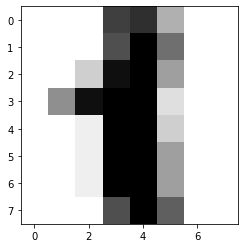

The model guessed this was: 3.
This actually is: 9.



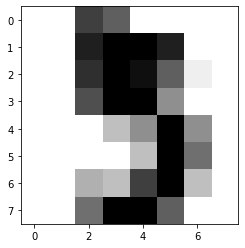

The model guessed this was: 3.
This actually is: 1.



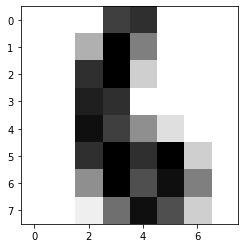

The model guessed this was: 3.
This actually is: 5.



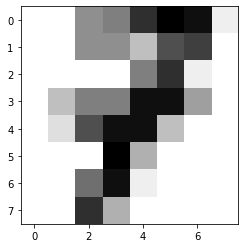

The model guessed this was: 3.
This actually is: 2.



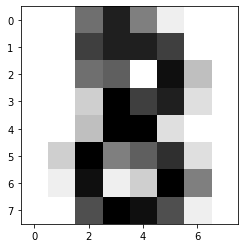

The model guessed this was: 3.
This actually is: 5.



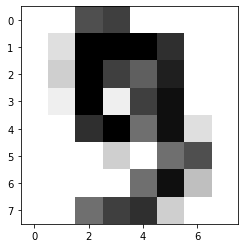

The model guessed this was: 3.
This actually is: 2.



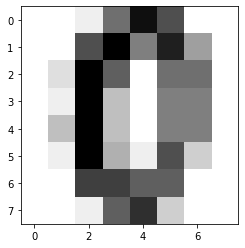

The model guessed this was: 3.
This actually is: 1.



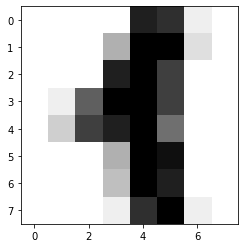

The model guessed this was: 3.
This actually is: 9.



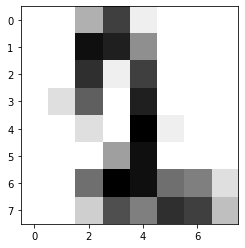

The model guessed this was: 3.
This actually is: 4.



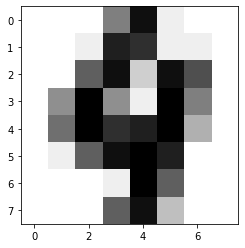

The model guessed this was: 3.
This actually is: 4.



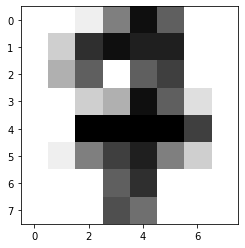

The model guessed this was: 3.
This actually is: 7.



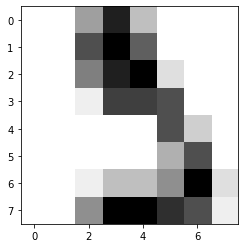

The model guessed this was: 3.
This actually is: 8.



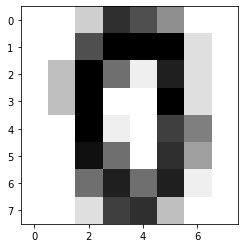

The model guessed this was: 3.
This actually is: 4.



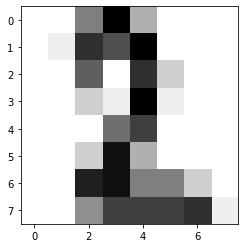

The model guessed this was: 3.
This actually is: 9.



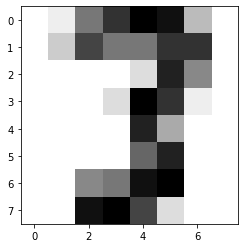

The model guessed this was: 3.
This actually is: 7.



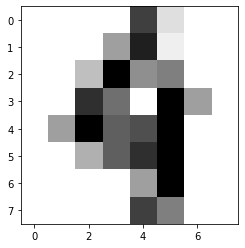

The model guessed this was: 3.
This actually is: 5.



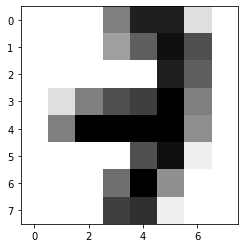

The model guessed this was: 3.
This actually is: 5.



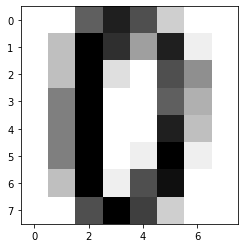

The model guessed this was: 3.
This actually is: 4.



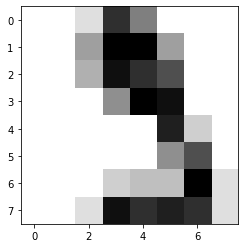

The model guessed this was: 3.
This actually is: 9.



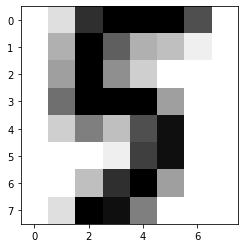

The model guessed this was: 3.
This actually is: 1.



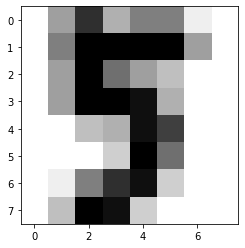

The model guessed this was: 3.
This actually is: 4.



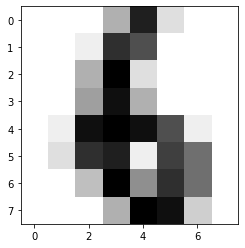

The model guessed this was: 3.
This actually is: 4.



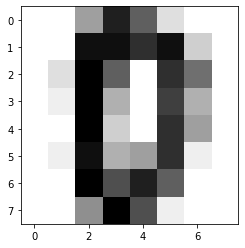

The model guessed this was: 3.
This actually is: 9.



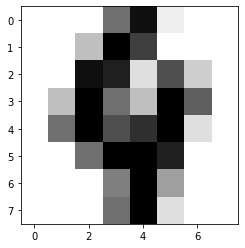

The model guessed this was: 3.
This actually is: 9.



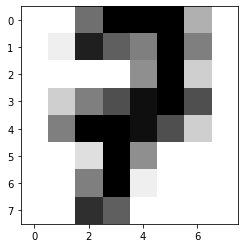

The model guessed this was: 3.
This actually is: 6.



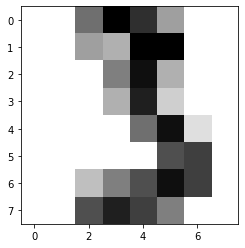

The model guessed this was: 3.
This actually is: 1.



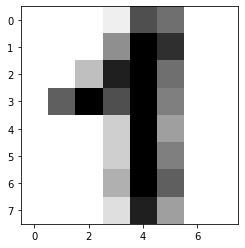

The model guessed this was: 3.
This actually is: 0.



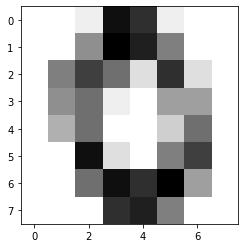

The model guessed this was: 3.
This actually is: 5.



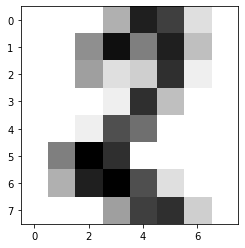

The model guessed this was: 3.
This actually is: 5.



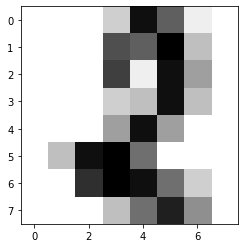

The model guessed this was: 3.
This actually is: 1.



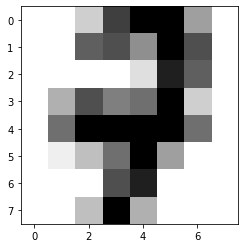

The model guessed this was: 3.
This actually is: 9.



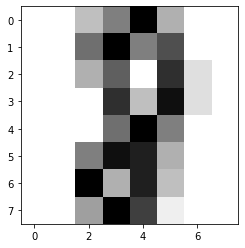

The model guessed this was: 3.
This actually is: 5.



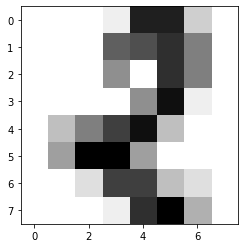

The model guessed this was: 3.
This actually is: 6.



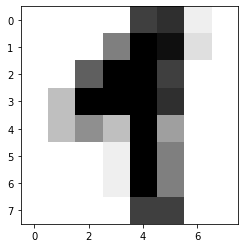

The model guessed this was: 3.
This actually is: 9.



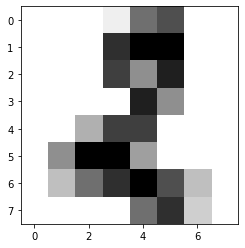

The model guessed this was: 3.
This actually is: 0.



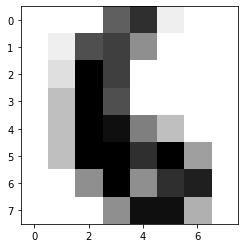

The model guessed this was: 3.
This actually is: 0.



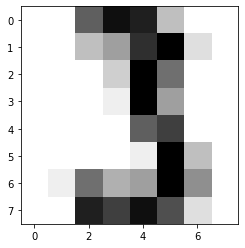

The model guessed this was: 3.
This actually is: 0.



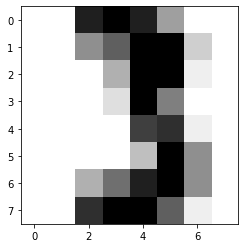

The model guessed this was: 3.
This actually is: 5.



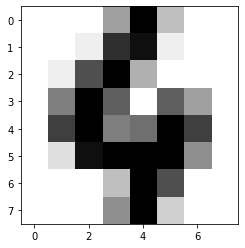

The model guessed this was: 3.
This actually is: 4.



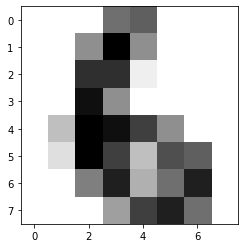

The model guessed this was: 3.
This actually is: 5.



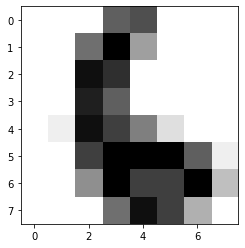

The model guessed this was: 3.
This actually is: 7.



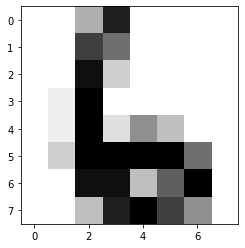

The model guessed this was: 3.
This actually is: 0.



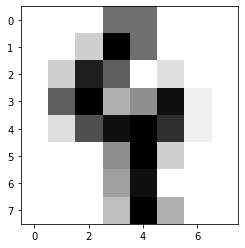

The model guessed this was: 3.
This actually is: 7.



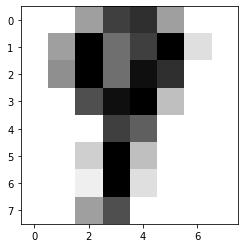

The model guessed this was: 3.
This actually is: 5.



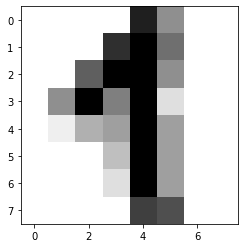

The model guessed this was: 3.
This actually is: 9.



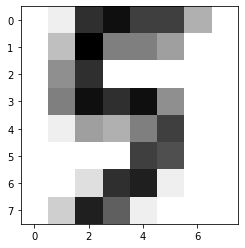

The model guessed this was: 3.
This actually is: 5.



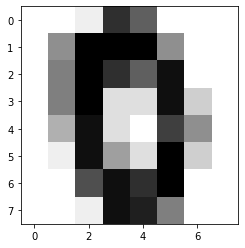

The model guessed this was: 3.
This actually is: 5.



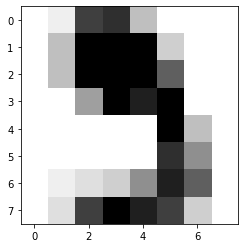

The model guessed this was: 3.
This actually is: 4.



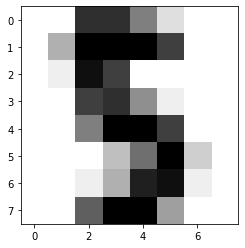

The model guessed this was: 3.
This actually is: 7.



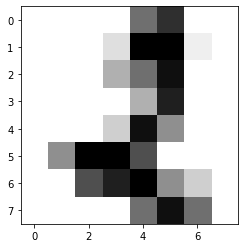

The model guessed this was: 3.
This actually is: 0.



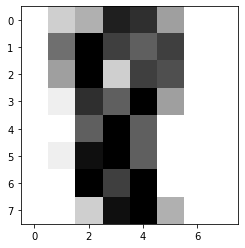

The model guessed this was: 3.
This actually is: 4.



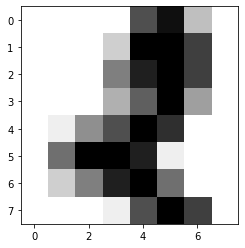

The model guessed this was: 3.
This actually is: 5.



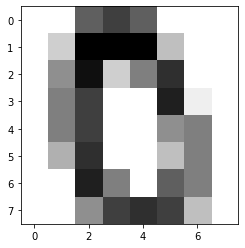

The model guessed this was: 3.
This actually is: 5.



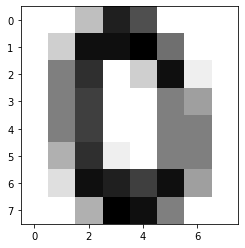

The model guessed this was: 3.
This actually is: 9.



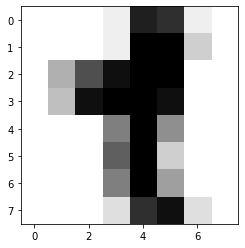

The model guessed this was: 3.
This actually is: 9.



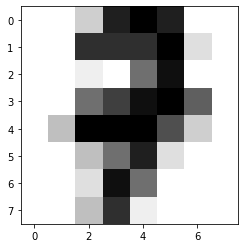

The model guessed this was: 3.
This actually is: 0.



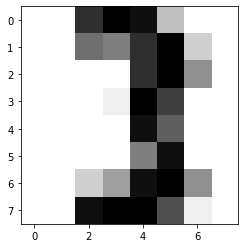

The model guessed this was: 3.
This actually is: 9.



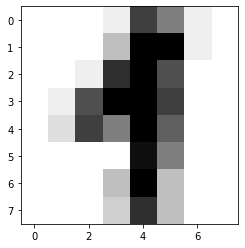

The model guessed this was: 3.
This actually is: 1.



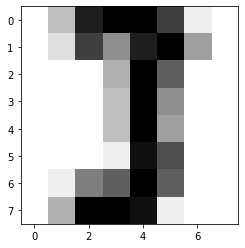

The model guessed this was: 3.
This actually is: 2.



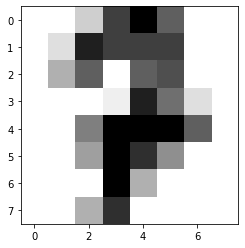

The model guessed this was: 3.
This actually is: 5.



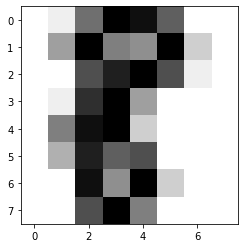

The model guessed this was: 3.
This actually is: 9.



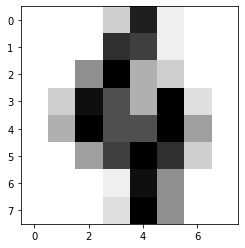

The model guessed this was: 3.
This actually is: 0.



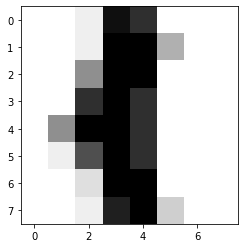

The model guessed this was: 3.
This actually is: 4.



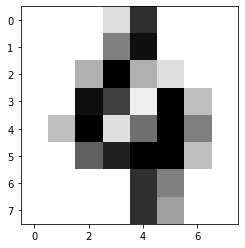

The model guessed this was: 3.
This actually is: 4.



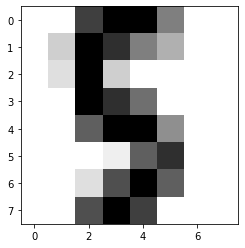

The model guessed this was: 3.
This actually is: 5.



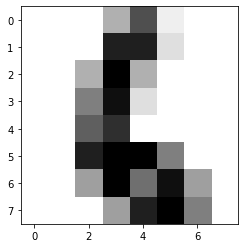

The model guessed this was: 3.
This actually is: 5.



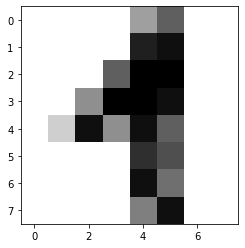

The model guessed this was: 3.
This actually is: 9.



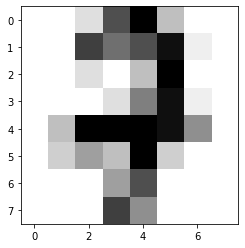

The model guessed this was: 3.
This actually is: 4.



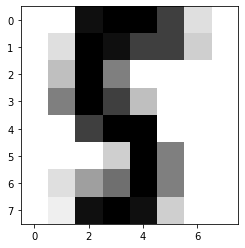

The model guessed this was: 3.
This actually is: 2.



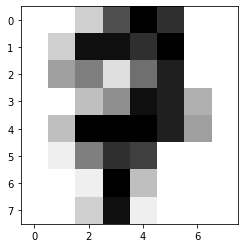

The model guessed this was: 3.
This actually is: 4.



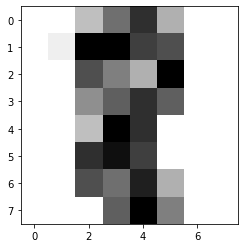

The model guessed this was: 3.
This actually is: 1.



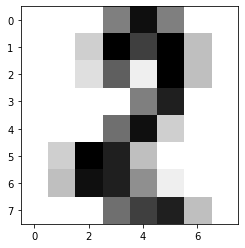

The model guessed this was: 3.
This actually is: 9.



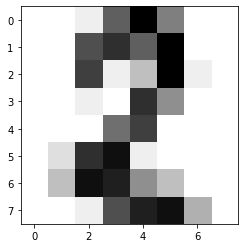

The model guessed this was: 3.
This actually is: 2.



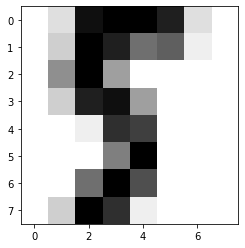

The model guessed this was: 3.
This actually is: 7.



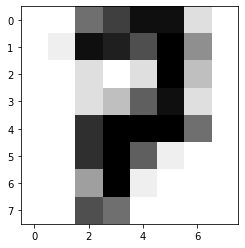

The model guessed this was: 3.
This actually is: 8.



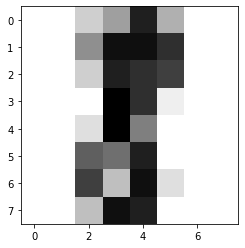

The model guessed this was: 3.
This actually is: 9.



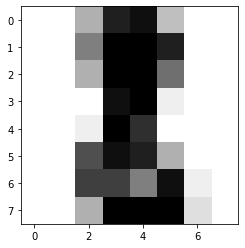

The model guessed this was: 3.
This actually is: 4.



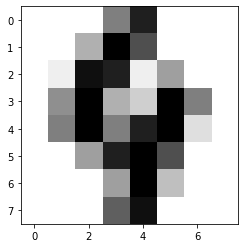

The model guessed this was: 3.
This actually is: 0.



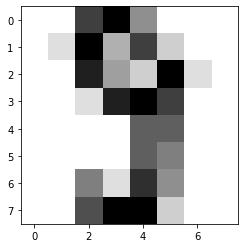

The model guessed this was: 3.
This actually is: 7.



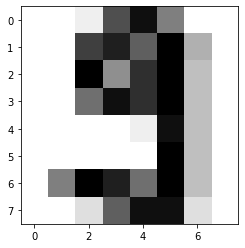

The model guessed this was: 3.
This actually is: 5.



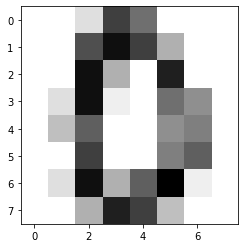

The model guessed this was: 3.
This actually is: 7.



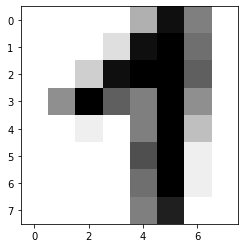

The model guessed this was: 3.
This actually is: 5.



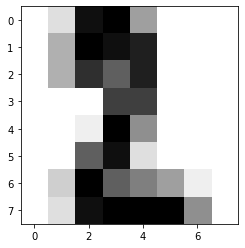

The model guessed this was: 3.
This actually is: 7.



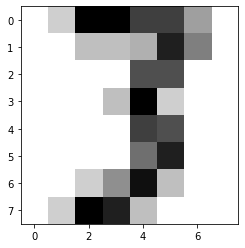

The model guessed this was: 3.
This actually is: 7.



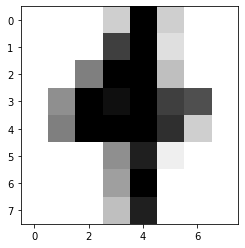

The model guessed this was: 3.
This actually is: 0.



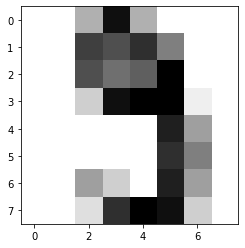

The model guessed this was: 3.
This actually is: 8.



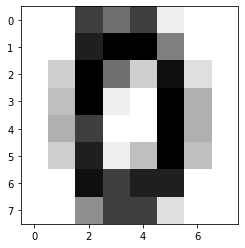

The model guessed this was: 3.
This actually is: 0.



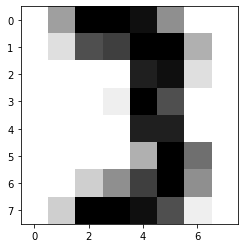

The model guessed this was: 3.
This actually is: 6.



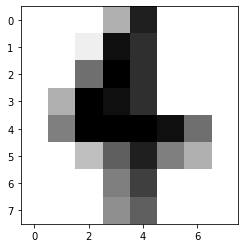

The model guessed this was: 3.
This actually is: 9.



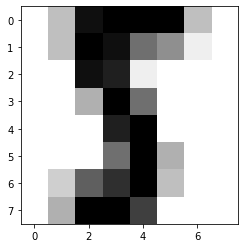

The model guessed this was: 3.
This actually is: 9.



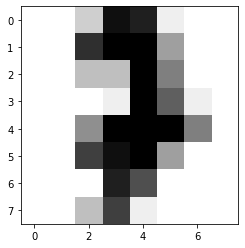

The model guessed this was: 3.
This actually is: 9.



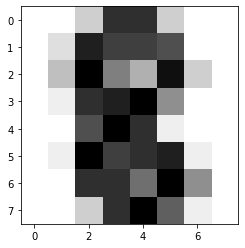

The model guessed this was: 3.
This actually is: 0.



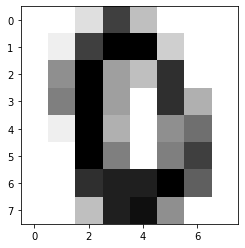

The model guessed this was: 3.
This actually is: 5.



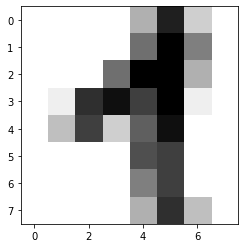

The model guessed this was: 3.
This actually is: 6.



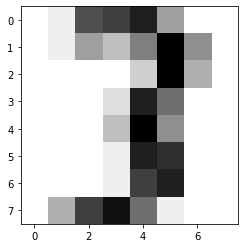

The model guessed this was: 3.
This actually is: 0.



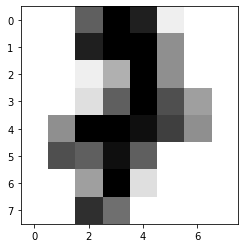

The model guessed this was: 3.
This actually is: 9.



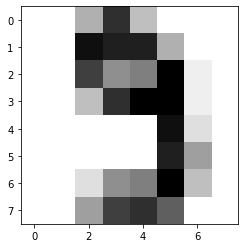

The model guessed this was: 3.
This actually is: 9.



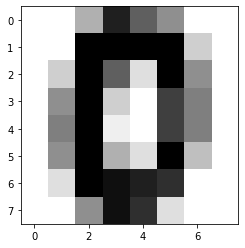

The model guessed this was: 3.
This actually is: 7.



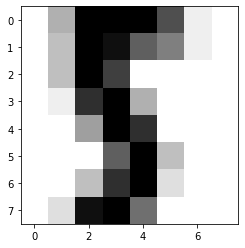

The model guessed this was: 3.
This actually is: 9.



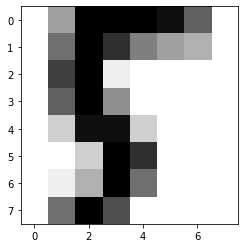

The model guessed this was: 3.
This actually is: 0.



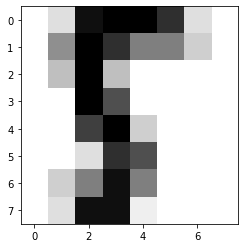

The model guessed this was: 3.
This actually is: 5.



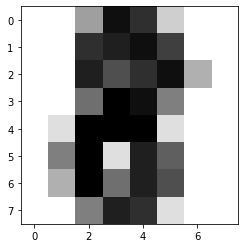

The model guessed this was: 3.
This actually is: 5.



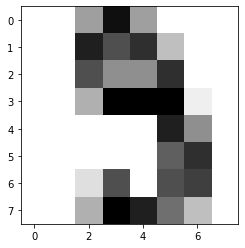

The model guessed this was: 3.
This actually is: 9.



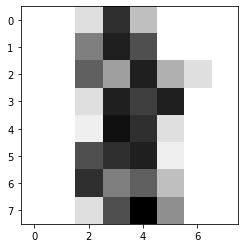

The model guessed this was: 3.
This actually is: 9.



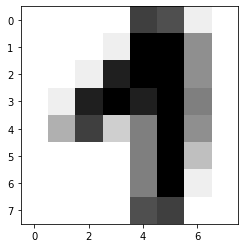

The model guessed this was: 3.
This actually is: 7.



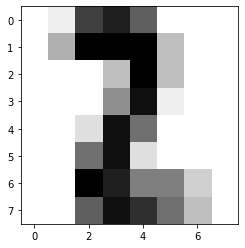

The model guessed this was: 3.
This actually is: 9.



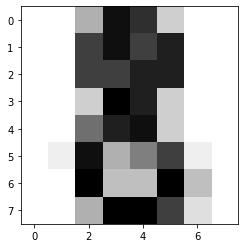

The model guessed this was: 3.
This actually is: 0.



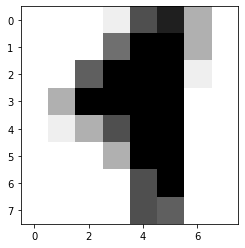

The model guessed this was: 3.
This actually is: 2.



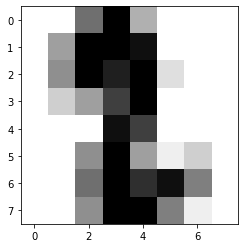

The model guessed this was: 3.
This actually is: 5.



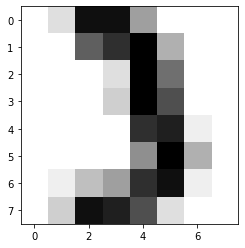

The model guessed this was: 3.
This actually is: 9.



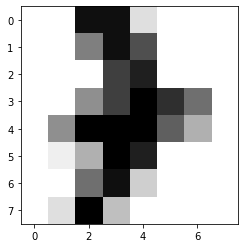

The model guessed this was: 3.
This actually is: 4.



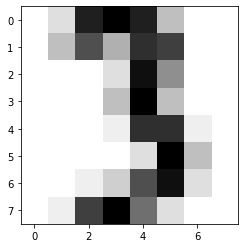

The model guessed this was: 3.
This actually is: 5.



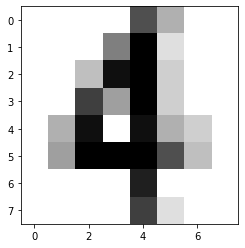

The model guessed this was: 3.
This actually is: 4.



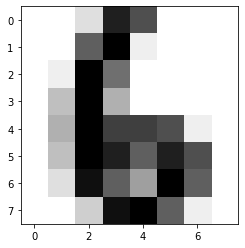

The model guessed this was: 3.
This actually is: 6.



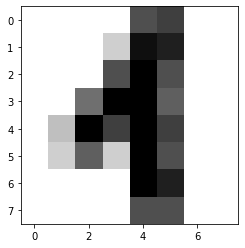

The model guessed this was: 3.
This actually is: 5.



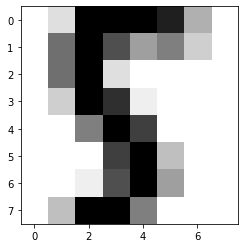

The model guessed this was: 3.
This actually is: 9.



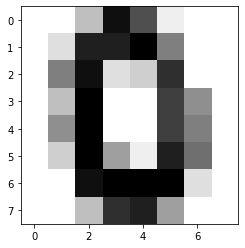

The model guessed this was: 3.
This actually is: 5.



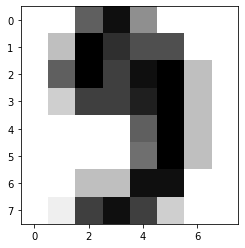

The model guessed this was: 3.
This actually is: 7.



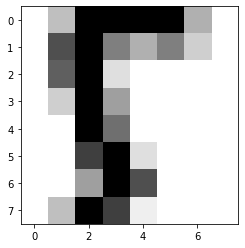

The model guessed this was: 3.
This actually is: 8.



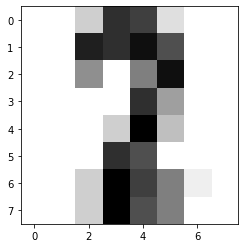

The model guessed this was: 3.
This actually is: 9.



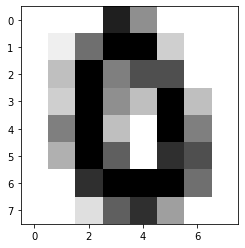

The model guessed this was: 3.
This actually is: 5.



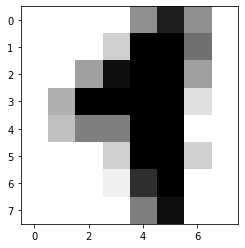

The model guessed this was: 3.
This actually is: 4.



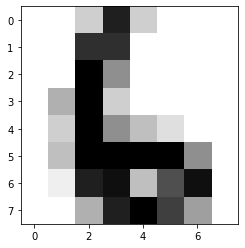

The model guessed this was: 3.
This actually is: 9.



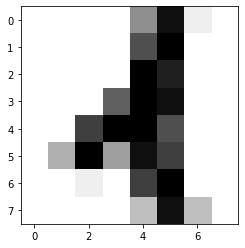

The model guessed this was: 3.
This actually is: 8.



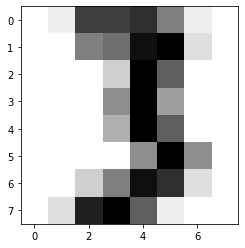

The model guessed this was: 3.
This actually is: 5.



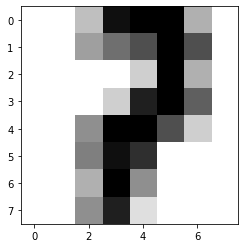

The model guessed this was: 3.
This actually is: 4.



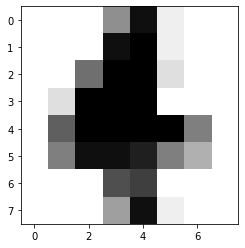

The model guessed this was: 3.
This actually is: 5.



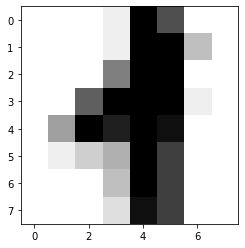

The model guessed this was: 3.
This actually is: 0.



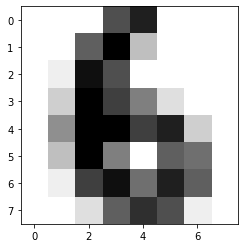

The model guessed this was: 3.
This actually is: 7.



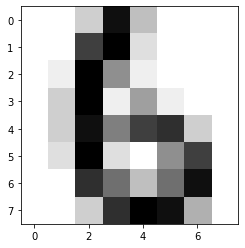

The model guessed this was: 3.
This actually is: 5.



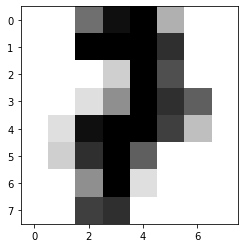

The model guessed this was: 3.
This actually is: 4.



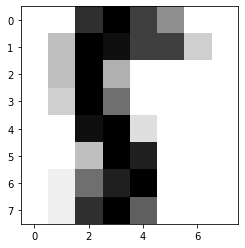

The model guessed this was: 3.
This actually is: 7.



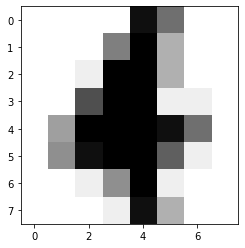

The model guessed this was: 3.
This actually is: 8.



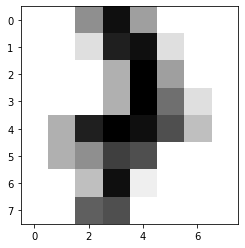

The model guessed this was: 3.
This actually is: 8.



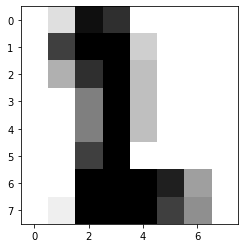

The model guessed this was: 3.
This actually is: 5.



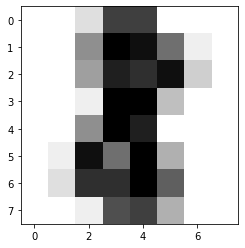

The model guessed this was: 3.
This actually is: 5.



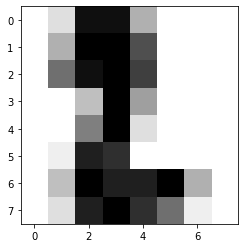

The model guessed this was: 3.
This actually is: 1.



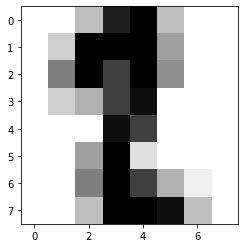

The model guessed this was: 3.
This actually is: 6.



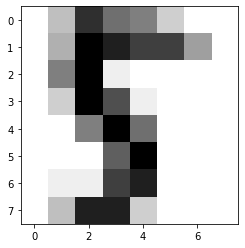

The model guessed this was: 3.
This actually is: 8.



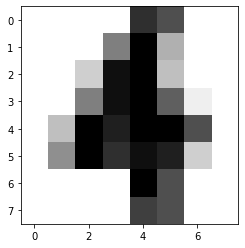

The model guessed this was: 3.
This actually is: 8.



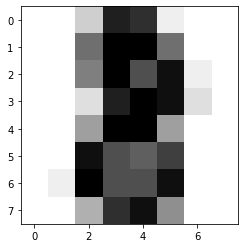

The model guessed this was: 3.
This actually is: 9.



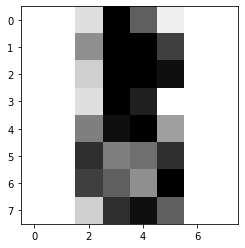

The model guessed this was: 3.
This actually is: 9.



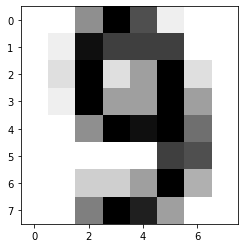

The model guessed this was: 3.
This actually is: 6.



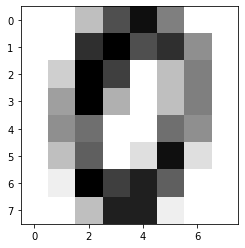

The model guessed this was: 3.
This actually is: 4.



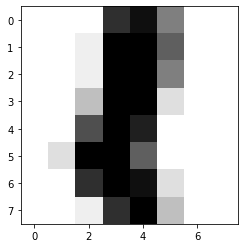

The model guessed this was: 3.
This actually is: 8.



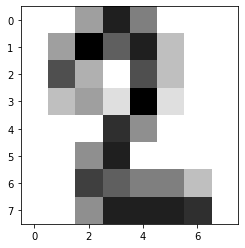

The model guessed this was: 3.
This actually is: 8.



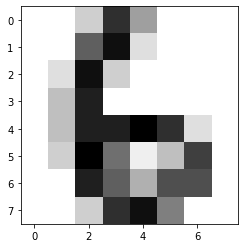

The model guessed this was: 3.
This actually is: 9.



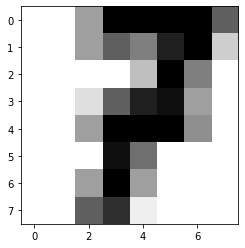

The model guessed this was: 3.
This actually is: 7.



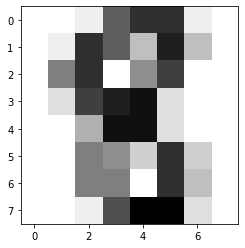

The model guessed this was: 3.
This actually is: 7.



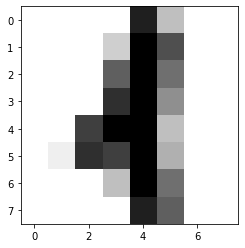

The model guessed this was: 3.
This actually is: 0.



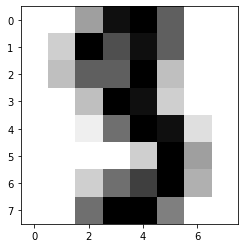

The model guessed this was: 3.
This actually is: 5.



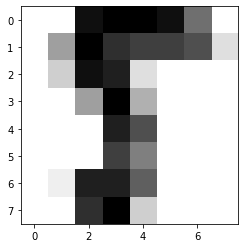

The model guessed this was: 3.
This actually is: 5.



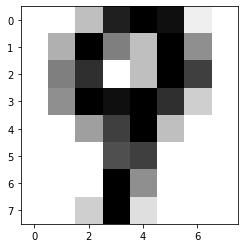

The model guessed this was: 3.
This actually is: 4.



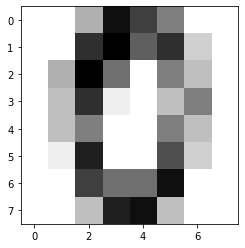

The model guessed this was: 3.
This actually is: 1.



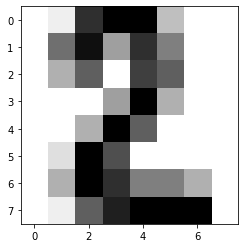

The model guessed this was: 3.
This actually is: 0.



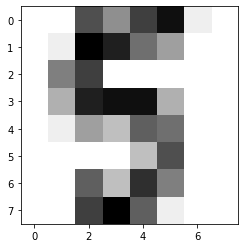

The model guessed this was: 3.
This actually is: 5.



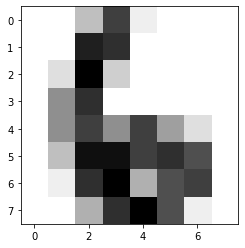

The model guessed this was: 3.
This actually is: 9.



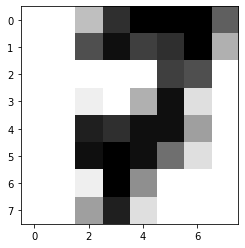

The model guessed this was: 3.
This actually is: 7.



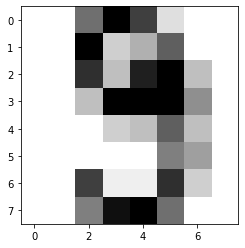

The model guessed this was: 3.
This actually is: 5.



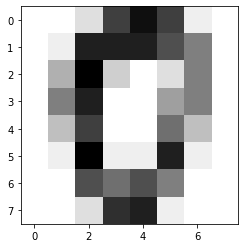

The model guessed this was: 3.
This actually is: 5.



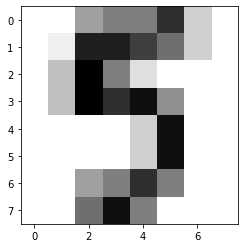

The model guessed this was: 3.
This actually is: 9.



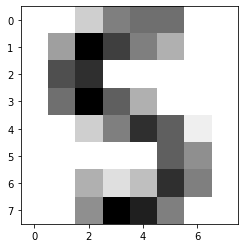

The model guessed this was: 3.
This actually is: 8.



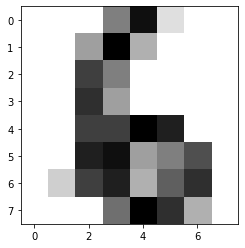

The model guessed this was: 3.
This actually is: 5.



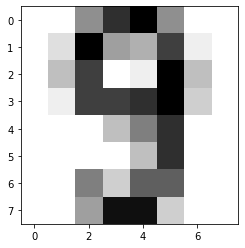

The model guessed this was: 3.
This actually is: 2.



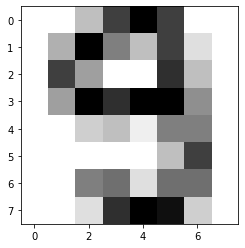

The model guessed this was: 3.
This actually is: 5.



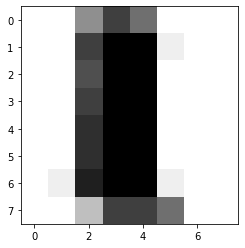

The model guessed this was: 3.
This actually is: 4.



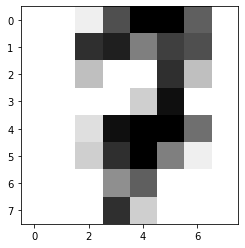

The model guessed this was: 3.
This actually is: 2.



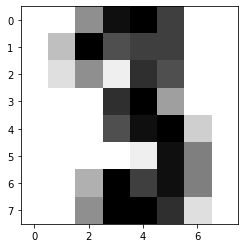

The model guessed this was: 3.
This actually is: 4.



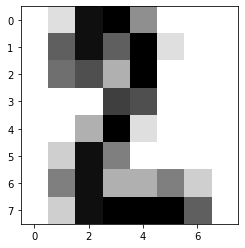

The model guessed this was: 3.
This actually is: 5.



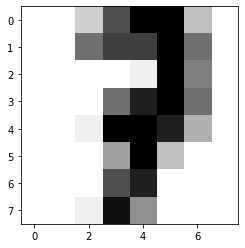

The model guessed this was: 3.
This actually is: 5.



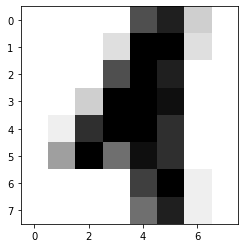

The model guessed this was: 3.
This actually is: 1.



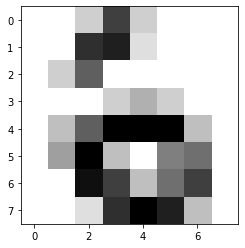

The model guessed this was: 3.
This actually is: 1.



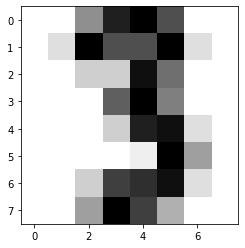

The model guessed this was: 3.
This actually is: 7.



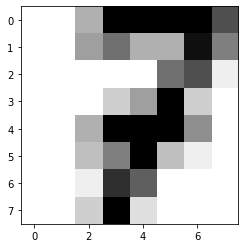

The model guessed this was: 3.
This actually is: 0.



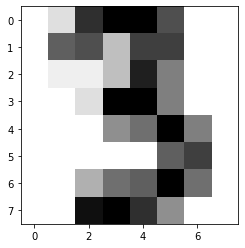

The model guessed this was: 3.
This actually is: 1.



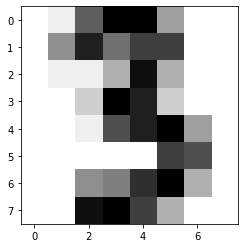

The model guessed this was: 3.
This actually is: 5.



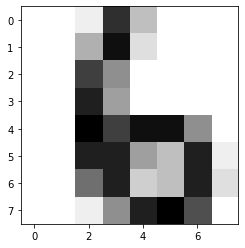

The model guessed this was: 3.
This actually is: 8.



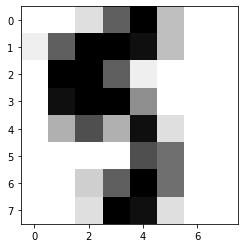

The model guessed this was: 3.
This actually is: 4.



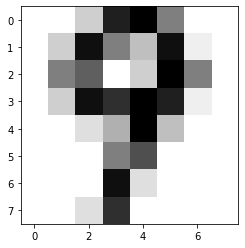

The model guessed this was: 3.
This actually is: 8.



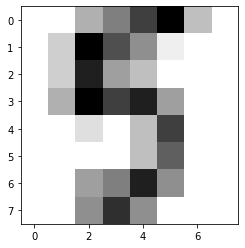

The model guessed this was: 3.
This actually is: 5.



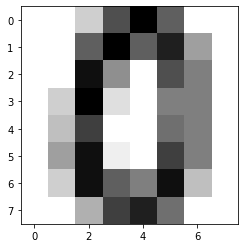

The model guessed this was: 3.
This actually is: 5.



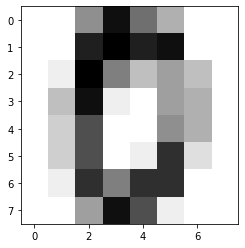

The model guessed this was: 3.
This actually is: 8.



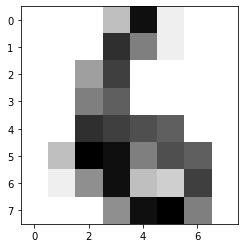

The model guessed this was: 3.
This actually is: 8.



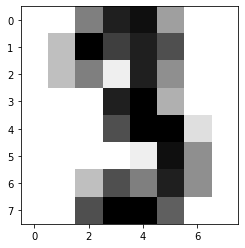

The model guessed this was: 3.
This actually is: 5.



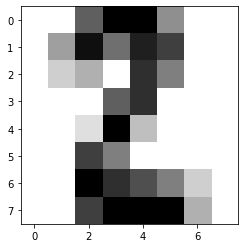

The model guessed this was: 3.
This actually is: 0.



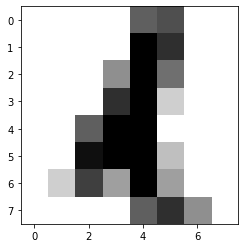

The model guessed this was: 3.
This actually is: 6.



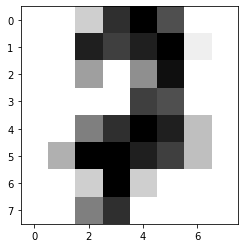

The model guessed this was: 3.
This actually is: 2.



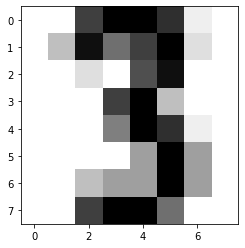

The model guessed this was: 3.
This actually is: 9.



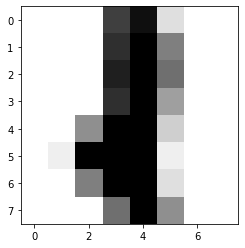

The model guessed this was: 3.
This actually is: 8.



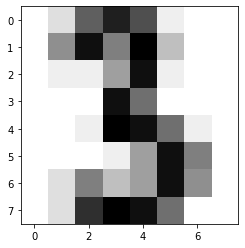

The model guessed this was: 3.
This actually is: 9.



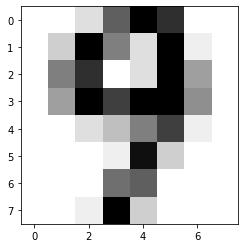

The model guessed this was: 3.
This actually is: 5.



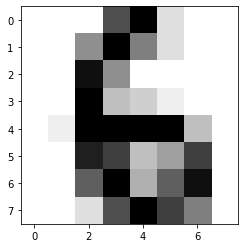

The model guessed this was: 3.
This actually is: 7.



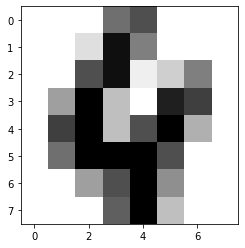

The model guessed this was: 3.
This actually is: 8.



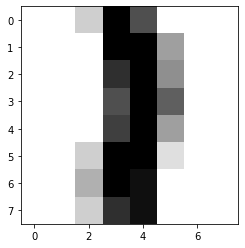

The model guessed this was: 3.
This actually is: 4.



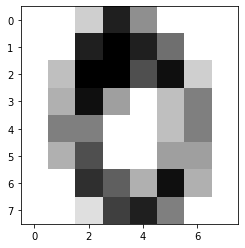

The model guessed this was: 3.
This actually is: 8.



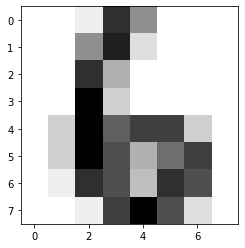

The model guessed this was: 3.
This actually is: 6.



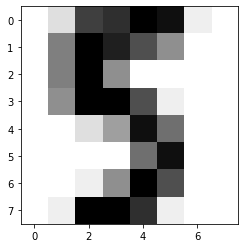

The model guessed this was: 3.
This actually is: 5.



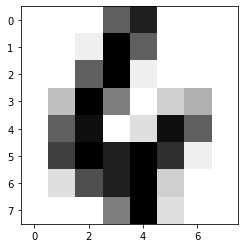

The model guessed this was: 3.
This actually is: 0.



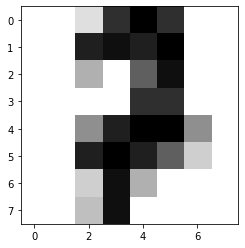

The model guessed this was: 3.
This actually is: 4.



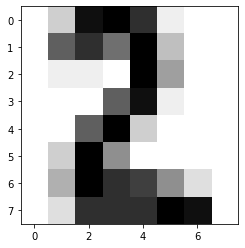

The model guessed this was: 3.
This actually is: 8.



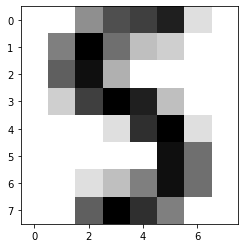

The model guessed this was: 3.
This actually is: 5.



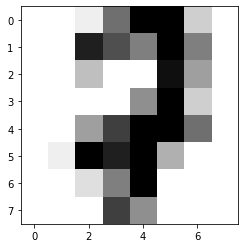

The model guessed this was: 3.
This actually is: 9.



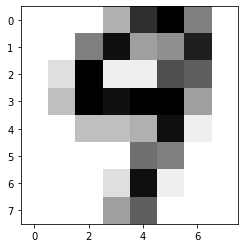

The model guessed this was: 3.
This actually is: 6.



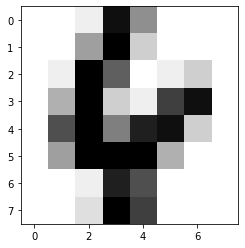

The model guessed this was: 3.
This actually is: 1.



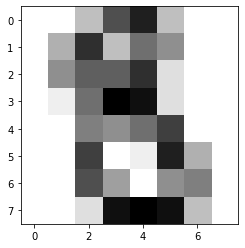

The model guessed this was: 3.
This actually is: 8.



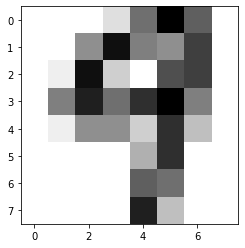

The model guessed this was: 3.
This actually is: 2.



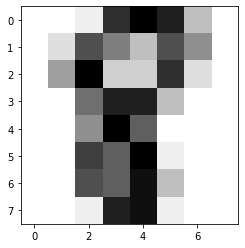

The model guessed this was: 3.
This actually is: 8.



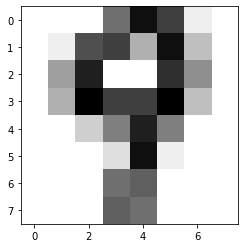

The model guessed this was: 3.
This actually is: 9.



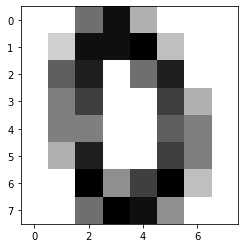

The model guessed this was: 3.
This actually is: 8.



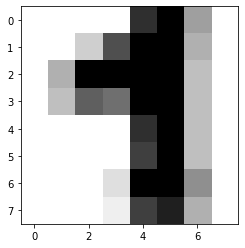

The model guessed this was: 3.
This actually is: 5.



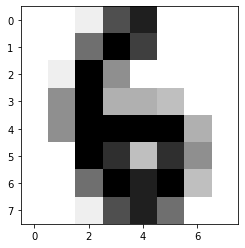

The model guessed this was: 3.
This actually is: 7.



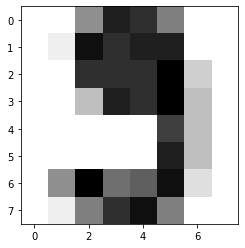

The model guessed this was: 3.
This actually is: 4.



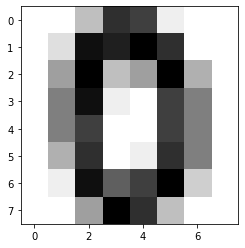

The model guessed this was: 3.
This actually is: 1.



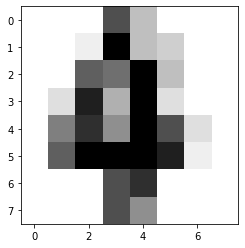

The model guessed this was: 3.
This actually is: 6.



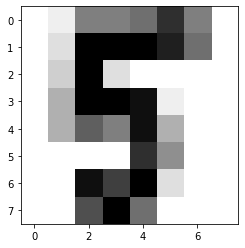

The model guessed this was: 3.
This actually is: 4.



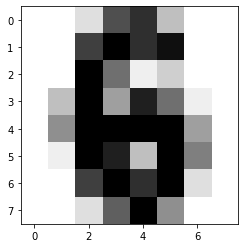

The model guessed this was: 3.
This actually is: 7.



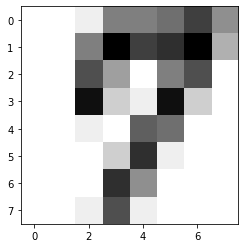

The model guessed this was: 3.
This actually is: 4.



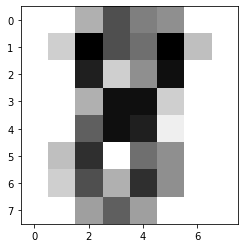

The model guessed this was: 3.
This actually is: 8.



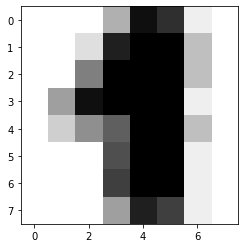

The model guessed this was: 3.
This actually is: 0.



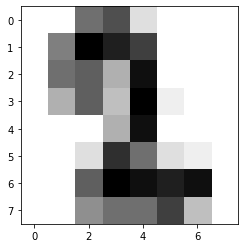

The model guessed this was: 3.
This actually is: 5.



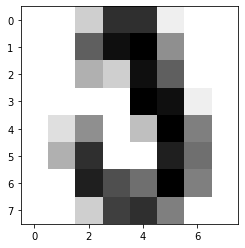

The model guessed this was: 3.
This actually is: 1.



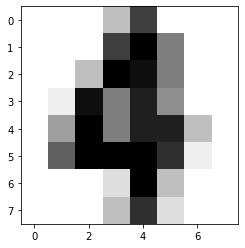

The model guessed this was: 3.
This actually is: 9.



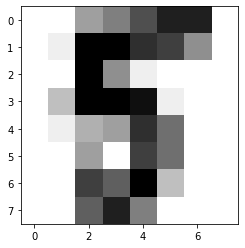

The model guessed this was: 3.
This actually is: 4.



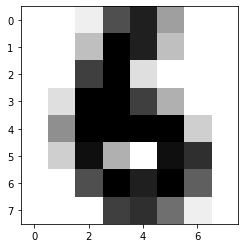

The model guessed this was: 3.
This actually is: 5.



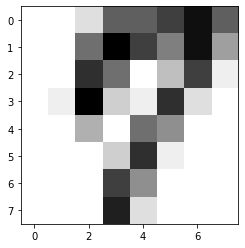

The model guessed this was: 3.
This actually is: 7.



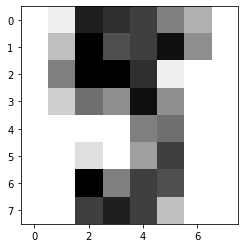

The model guessed this was: 3.
This actually is: 5.



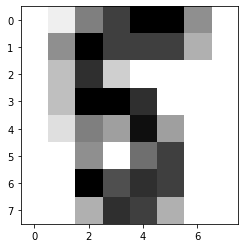

The model guessed this was: 3.
This actually is: 9.



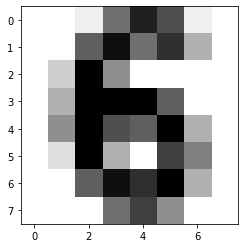

The model guessed this was: 3.
This actually is: 7.



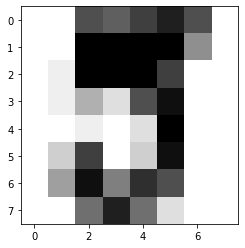

The model guessed this was: 3.
This actually is: 5.



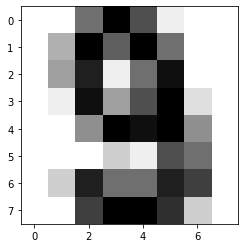

The model guessed this was: 3.
This actually is: 7.



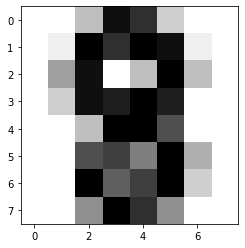

The model guessed this was: 3.
This actually is: 4.



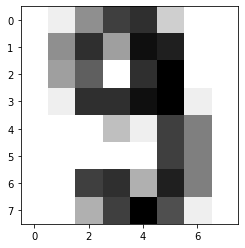

The model guessed this was: 3.
This actually is: 2.



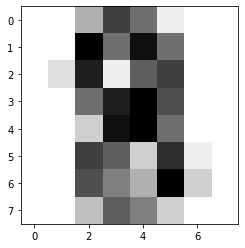

The model guessed this was: 3.
This actually is: 1.



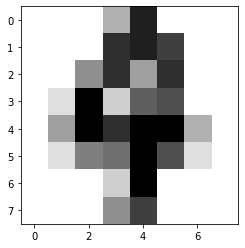

The model guessed this was: 3.
This actually is: 9.



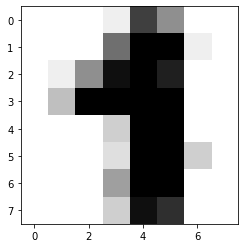

The model guessed this was: 3.
This actually is: 0.



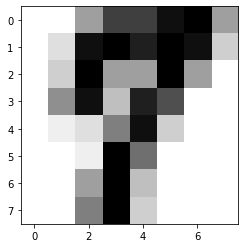

The model guessed this was: 3.
This actually is: 5.



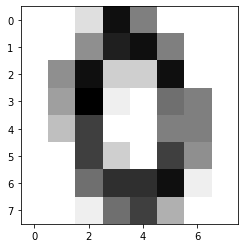

The model guessed this was: 3.
This actually is: 9.



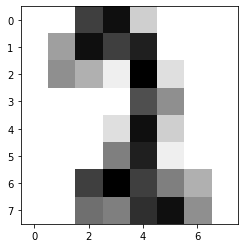

The model guessed this was: 3.
This actually is: 9.



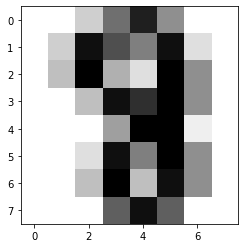

The model guessed this was: 3.
This actually is: 0.



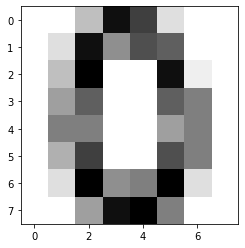

The model guessed this was: 3.
This actually is: 5.



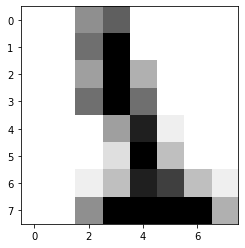

The model guessed this was: 3.
This actually is: 5.



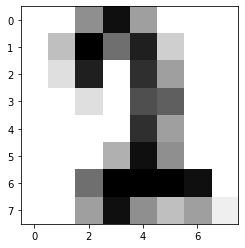

The model guessed this was: 3.
This actually is: 8.



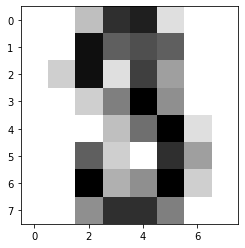

The model guessed this was: 3.
This actually is: 6.



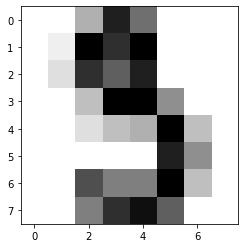

The model guessed this was: 3.
This actually is: 5.



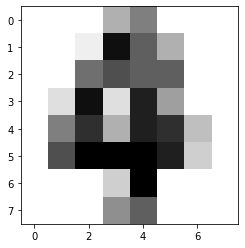

The model guessed this was: 3.
This actually is: 5.



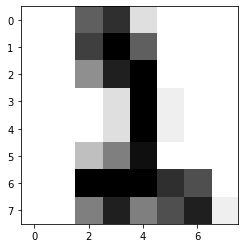

The model guessed this was: 3.
This actually is: 5.



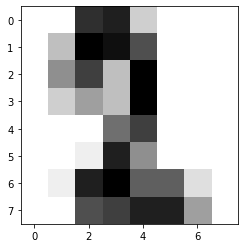

The model guessed this was: 3.
This actually is: 7.



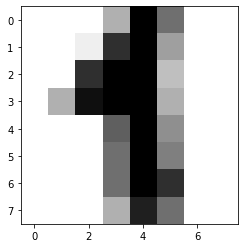

The model guessed this was: 3.
This actually is: 5.



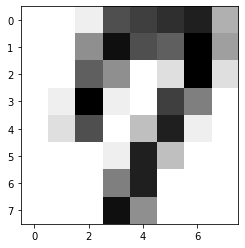

The model guessed this was: 3.
This actually is: 9.



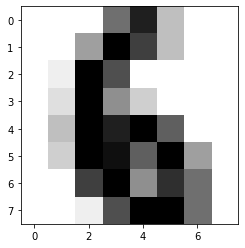

The model guessed this was: 3.
This actually is: 9.



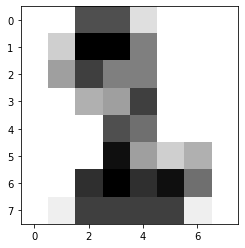

The model guessed this was: 3.
This actually is: 5.



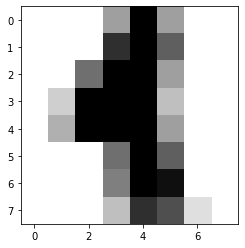

The model guessed this was: 3.
This actually is: 6.



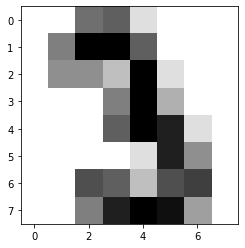

The model guessed this was: 3.
This actually is: 9.



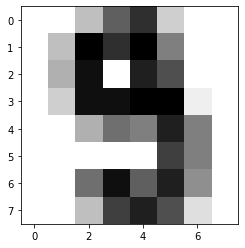

The model guessed this was: 3.
This actually is: 6.



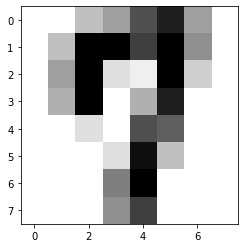

The model guessed this was: 3.
This actually is: 1.



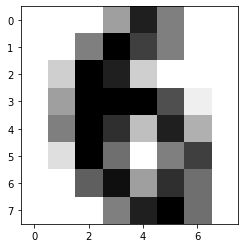

The model guessed this was: 3.
This actually is: 0.



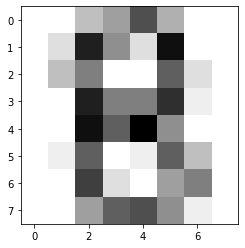

The model guessed this was: 3.
This actually is: 0.



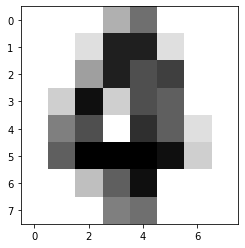

The model guessed this was: 3.
This actually is: 2.



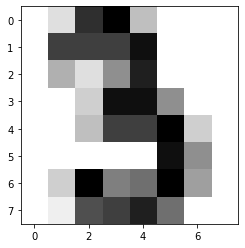

The model guessed this was: 3.
This actually is: 9.



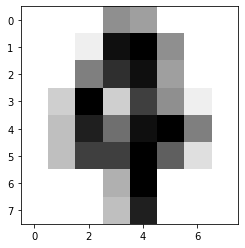

The model guessed this was: 3.
This actually is: 9.



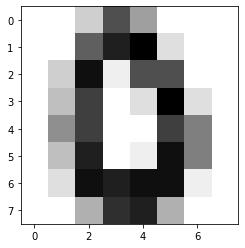

The model guessed this was: 3.
This actually is: 9.



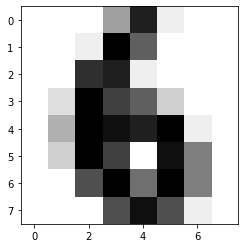

The model guessed this was: 3.
This actually is: 7.



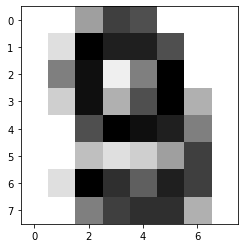

The model guessed this was: 3.
This actually is: 1.



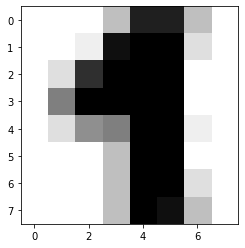

The model guessed this was: 3.
This actually is: 5.



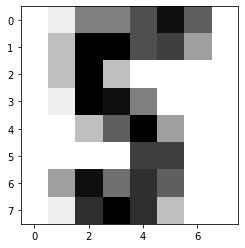

The model guessed this was: 3.
This actually is: 6.



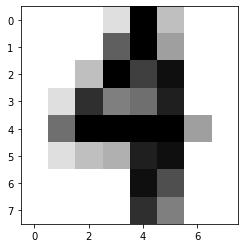

The model guessed this was: 3.
This actually is: 1.



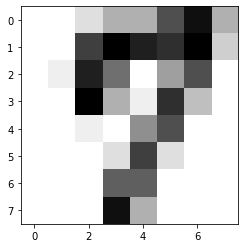

The model guessed this was: 3.
This actually is: 1.



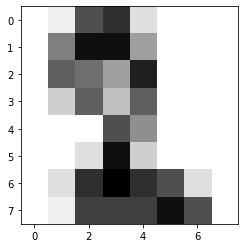

The model guessed this was: 3.
This actually is: 1.



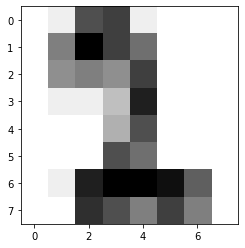

The model guessed this was: 3.
This actually is: 7.



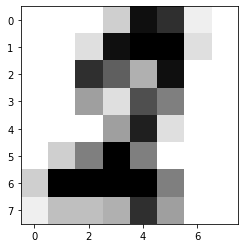

The model guessed this was: 3.
This actually is: 6.



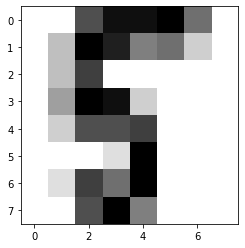

The model guessed this was: 3.
This actually is: 9.



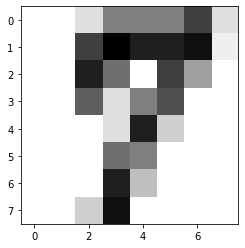

The model guessed this was: 3.
This actually is: 2.



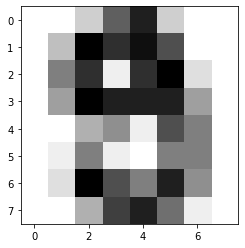

The model guessed this was: 3.
This actually is: 0.



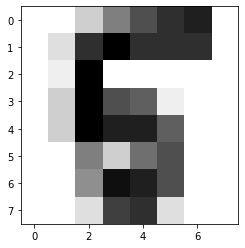

The model guessed this was: 3.
This actually is: 4.



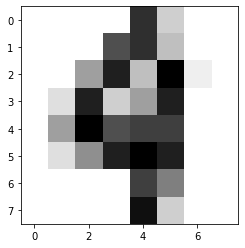

The model guessed this was: 3.
This actually is: 4.



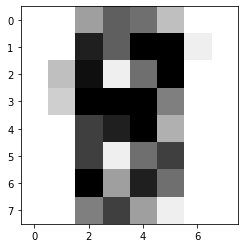

The model guessed this was: 3.
This actually is: 8.



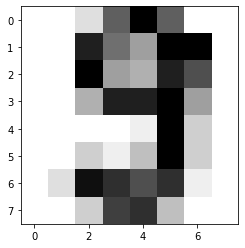

The model guessed this was: 3.
This actually is: 1.



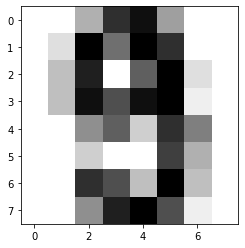

The model guessed this was: 3.
This actually is: 7.



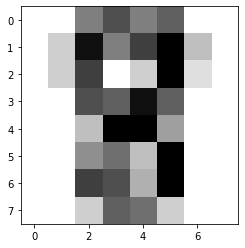

The model guessed this was: 3.
This actually is: 1.



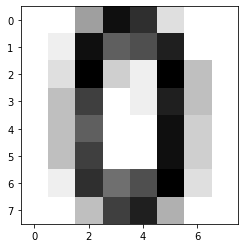

The model guessed this was: 3.
This actually is: 9.



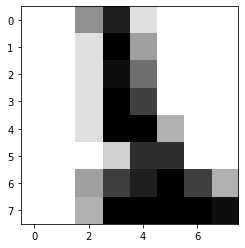

The model guessed this was: 3.
This actually is: 5.



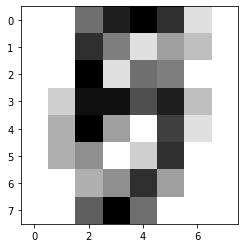

The model guessed this was: 3.
This actually is: 0.



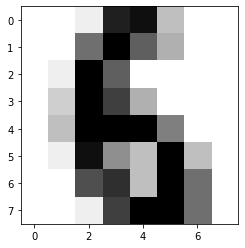

The model guessed this was: 3.
This actually is: 2.



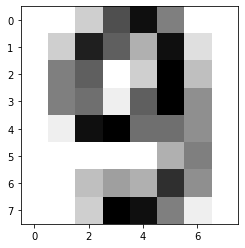

The model guessed this was: 3.
This actually is: 9.



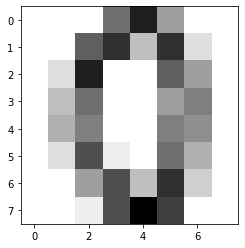

The model guessed this was: 3.
This actually is: 4.



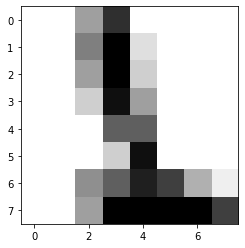

The model guessed this was: 3.
This actually is: 1.



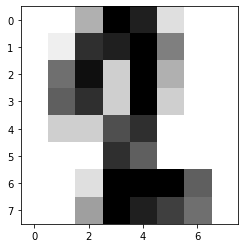

The model guessed this was: 3.
This actually is: 9.



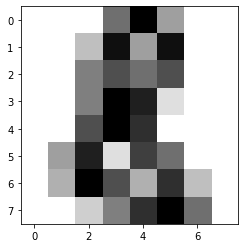

The model guessed this was: 3.
This actually is: 5.



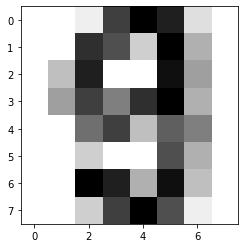

The model guessed this was: 3.
This actually is: 4.



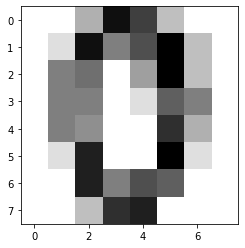

The model guessed this was: 3.
This actually is: 7.



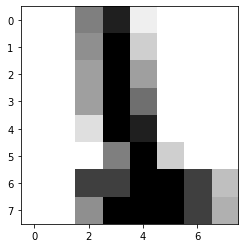

The model guessed this was: 3.
This actually is: 0.



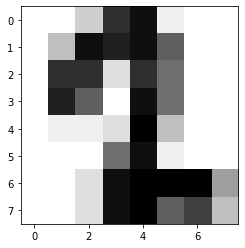

The model guessed this was: 3.
This actually is: 7.



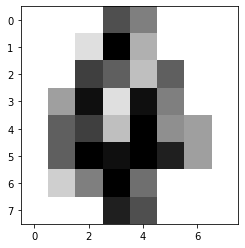

The model guessed this was: 3.
This actually is: 8.



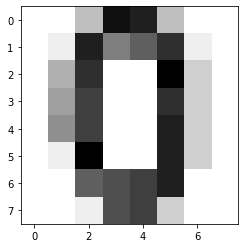

The model guessed this was: 3.
This actually is: 8.



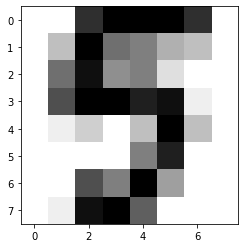

The model guessed this was: 3.
This actually is: 5.



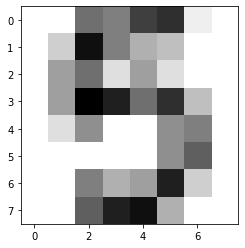

The model guessed this was: 3.
This actually is: 9.



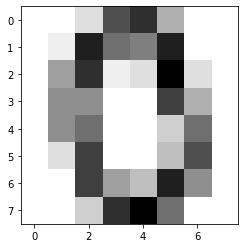

The model guessed this was: 3.
This actually is: 9.



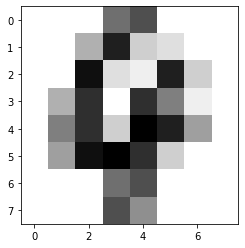

The model guessed this was: 3.
This actually is: 8.



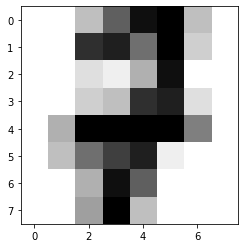

The model guessed this was: 3.
This actually is: 9.



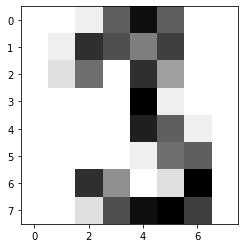

The model guessed this was: 3.
This actually is: 9.



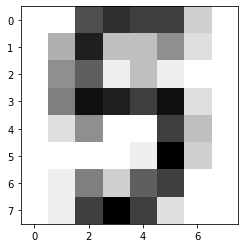

The model guessed this was: 3.
This actually is: 7.



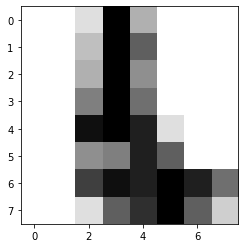

The model guessed this was: 3.
This actually is: 4.



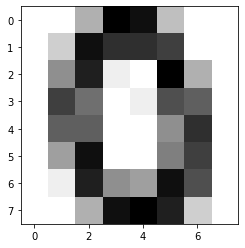

The model guessed this was: 3.
This actually is: 5.



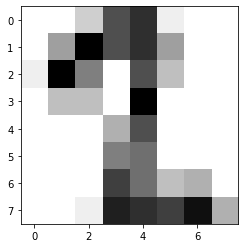

The model guessed this was: 3.
This actually is: 5.



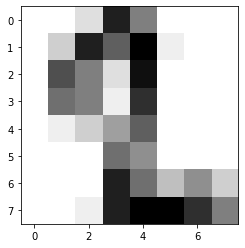

The model guessed this was: 3.
This actually is: 9.



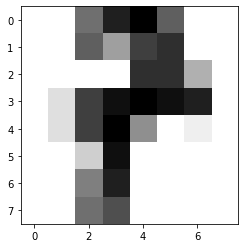

The model guessed this was: 3.
This actually is: 7.



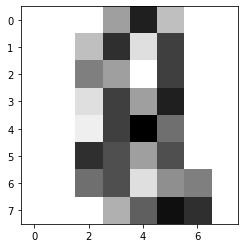

The model guessed this was: 3.
This actually is: 7.



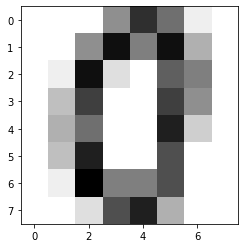

The model guessed this was: 3.
This actually is: 8.



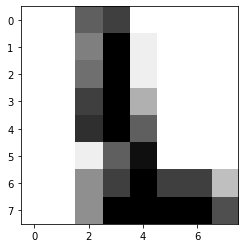

The model guessed this was: 3.
This actually is: 1.



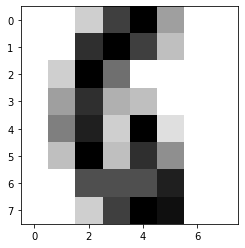

The model guessed this was: 3.
This actually is: 5.



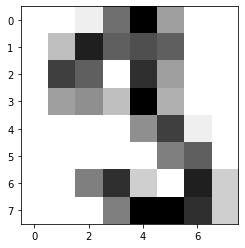

The model guessed this was: 3.
This actually is: 7.



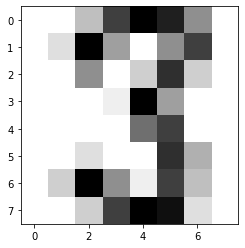

The model guessed this was: 3.
This actually is: 9.



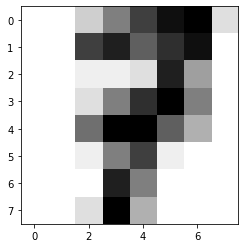

The model guessed this was: 3.
This actually is: 5.



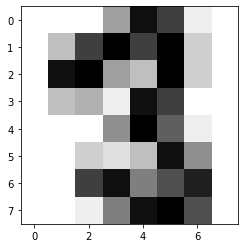

The model guessed this was: 3.
This actually is: 5.



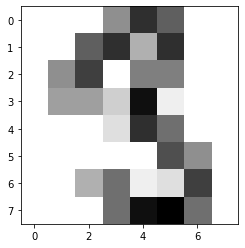

The model guessed this was: 3.
This actually is: 2.



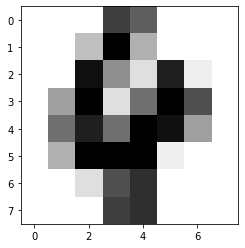

The model guessed this was: 3.
This actually is: 1.



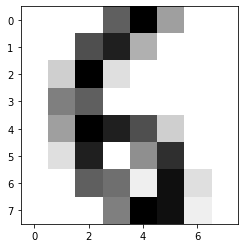

The model guessed this was: 3.
This actually is: 1.



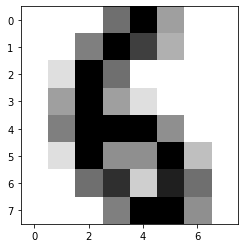

The model guessed this was: 3.
This actually is: 2.



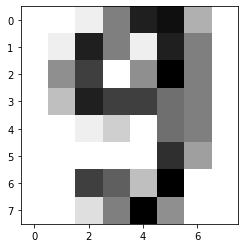

The model guessed this was: 3.
This actually is: 8.



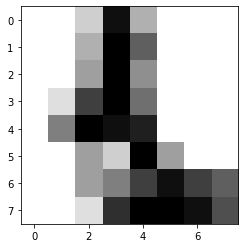

The model guessed this was: 3.
This actually is: 7.



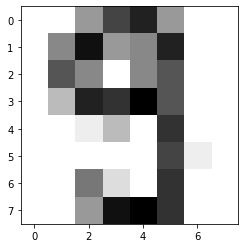

The model guessed this was: 3.
This actually is: 8.



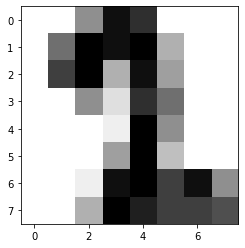

The model guessed this was: 3.
This actually is: 4.



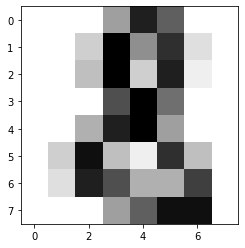

The model guessed this was: 3.
This actually is: 9.



In [40]:
# Use for loop to visualize all mistakes.
for value in row_ids:
    print_number(value)

### Support Vector Machines aren't even just for classification!

SVMs can be used for regression problems as well! The main ideas are the same - we still specify a cost tolerance `C` and a kernel - but [it's a bit more complicated](https://www.saedsayad.com/support_vector_machine_reg.htm). (For example, visualizing a "margin" is easier to do when we're separating two classes than when we're trying to predict some continuous outcome.) For this reason, we won't get into the mathematical details of support vector machines applied to regression, but we can instantiate a model using `svr = sklearn.svm.SVR()` and `.fit()`, `.predict()` like we do with all of our other models! Check out the documentation for [regression SVMs here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

### Pros and Cons of SVMs

#### Pros
- Exceptional perfomance (historically widely used)
- Robust to outliers
- Effective in high-dimensional data
- Can work with non-linear boundaries
- Fast to compute with most datasets (kernel trick)
- Low risk of overfitting

#### Cons
- Black box method
- Can be slow on large datasets

---
## Learning Objectives

*After this lesson, students will be able to:*
1. **Describe** linear separability.
2. **Differentiate between** maximal margin classifiers, support vector classifiers, and support vector machines.
3. **Implement** SVMs in `scikit-learn`.
4. **Describe** the effects of `C` and kernels on SVMs.